Question 9

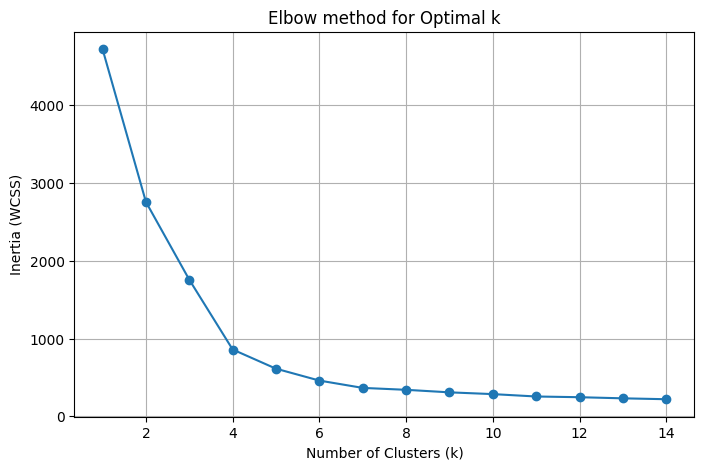

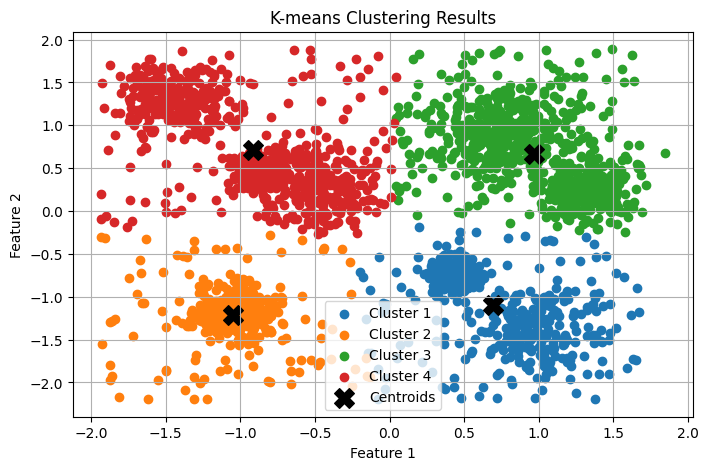

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("/content/A3_P1_7b27d5cc-755e-4f78-bab1-6c2373544adc.csv")
scaler=StandardScaler()
data=scaler.fit_transform(df) #load the dataset

#Elbow method, plot the wcss and inertia curve
wcss=[]
k_values = range(1,15)
for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=0,n_init='auto')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values,wcss,marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow method for Optimal k")
plt.grid(True)
plt.show


k_optimal=4 #we get optimal value of k as 4 from elbow curve
kmeans=KMeans(n_clusters=k_optimal,random_state=0,n_init='auto')
labels=kmeans.fit_predict(data)

plt.figure(figsize=(8,5))
for i in range(k_optimal):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f"Cluster {i+1}")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',marker='X',label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.grid('True')
plt.show()


Question 10

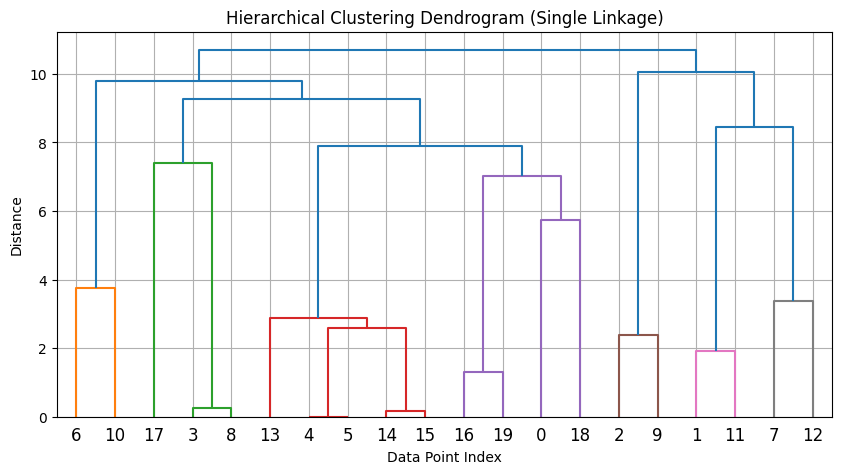

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Load the dataset
df = pd.read_csv("/content/A3_P2_170cd1d8-a072-4f67-ba36-10f26f772880.csv")
data = df.values

# Distance functions
def single_linkage(A, B):
    return np.min([np.linalg.norm(a - b) for a in A for b in B])

def complete_linkage(A, B):
    return np.max([np.linalg.norm(a - b) for a in A for b in B])

def average_linkage(A, B):
    return np.mean([np.linalg.norm(a - b) for a in A for b in B])

# Hierarchical clustering
def hierarchical_clustering(data, linkage_type):
    N = len(data)
    clusters = [(i, [i]) for i in range(N)]  # each cluster: (cluster_id, list of point indices)
    Z = []
    current_cluster_id = N

    while len(clusters) > 1:
        min_dist = float('inf')
        to_merge = (None, None)

        # Find closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                id1, idxs1 = clusters[i]
                id2, idxs2 = clusters[j]
                A = data[idxs1]
                B = data[idxs2]

                if linkage_type == "single":
                    dist = single_linkage(A, B)
                elif linkage_type == "complete":
                    dist = complete_linkage(A, B)
                elif linkage_type == "average":
                    dist = average_linkage(A, B)
                else:
                    raise ValueError("Unknown linkage type")

                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        i, j = to_merge
        id1, idxs1 = clusters[i]
        id2, idxs2 = clusters[j]
        merged_points = idxs1 + idxs2

        # Add row to linkage matrix
        Z.append([id1, id2, min_dist, len(merged_points)])

        # Remove old clusters and add new merged cluster
        for index in sorted([i, j], reverse=True):
            clusters.pop(index)
        clusters.append((current_cluster_id, merged_points))
        current_cluster_id += 1

    return np.array(Z)

# Choose linkage method
linkage_type = "single"  # or "complete", or "average"

# Run clustering
Z = hierarchical_clustering(data, linkage_type)

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_type.capitalize()} Linkage)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


